# 트리 기반 알고리즘 시각화
### sklearn.tree.export_graphviz

데이터셋 : 유방암 분류

In [1]:
import sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
SEED=111

# 데이터셋 load 및 split
cancer = sklearn.datasets.load_breast_cancer()
X_train, X_test , y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=SEED)

# 의사결정트리 학습
tree = DecisionTreeClassifier(random_state = SEED)
tree.fit(X_train, y_train)

print("trainSet 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("testSet 정확도: {:.3f}".format(tree.score(X_test,y_test)))

trainSet 정확도: 1.000
testSet 정확도: 0.951


시각화

In [ ]:
from sklearn.tree import export_graphviz

# .dot 파일로 export(저장)
export_graphviz(tree,
                out_file ="tree.dot",
                class_names = ["악성","양성"],
                feature_names = cancer.feature_names, 
                impurity=False,
                filled=True)
                
# 생성된 .dot 파일을 .png로 변환
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.system('dot -Tpng tree.dot -o decision-tree.png')

# jupyter notebook에서 .png 직접 출력
from IPython.display import Image
Image(filename = 'decision-tree.png')

랜덤 포레스트는 트리가 여러개라서 시각화 할 경우 하나씩 봐야함

# RandomForestClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier

- n_estimators : 사용할 트리 갯수
- criterion : 분할 품질을 측정하는 기능 (default=gini) {“gini”, “entropy”}
- max_depth : 트리의 최대 깊이
- min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_features : 각 노드에서 분할에 사용할 특징의 최대 수 (default=auto) {“auto”, “sqrt”, “log2”, int, float}
- max_leaf_nodes : 리프 노드의 최대수 (default=None) {int}
- min_impurity_decrease : 최소 불순도 (default=0.0)
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- bootstrap : 부트스트랩(중복허용 샘플링) 사용 여부 (default=True)
- oob_score : 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부 (deafult=False)
- n_jobs : 병렬 스레드 수 (default=None) {int}
- verbose : 실행 과정 출력 여부 (default=0) {int}
- warm_start : 이전 호출의 솔루션을 재사용하여 합계에 더 많은 견적가를 추가 (default=False)
- class_weight : 클래스 가중치 (default=None) {“balanced”, “balanced_subsample”, dict}
- random_state

<br>**추가 팁**<br>
작은 max_features와 큰 n_estimator 는 과대 적합을 줄인다는 장점이 있다.<br>
n_estimator, max_features를 조절하며 결정계수가 가장 높아지는 값을 사용하는 것이 좋다. 

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn

In [16]:
# 데이터 load 및 split
X, y = make_moons(n_samples= 100, noise = 0.25, random_state = SEED)
X_train, X_test , y_train, y_test = train_test_split(X, y , stratify = y, random_state = SEED)

# 랜덤 포레스트 학습
forest = RandomForestClassifier(n_estimators = 10, random_state=SEED)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=111)

### Decision Boundary(결정 경계) 시각화

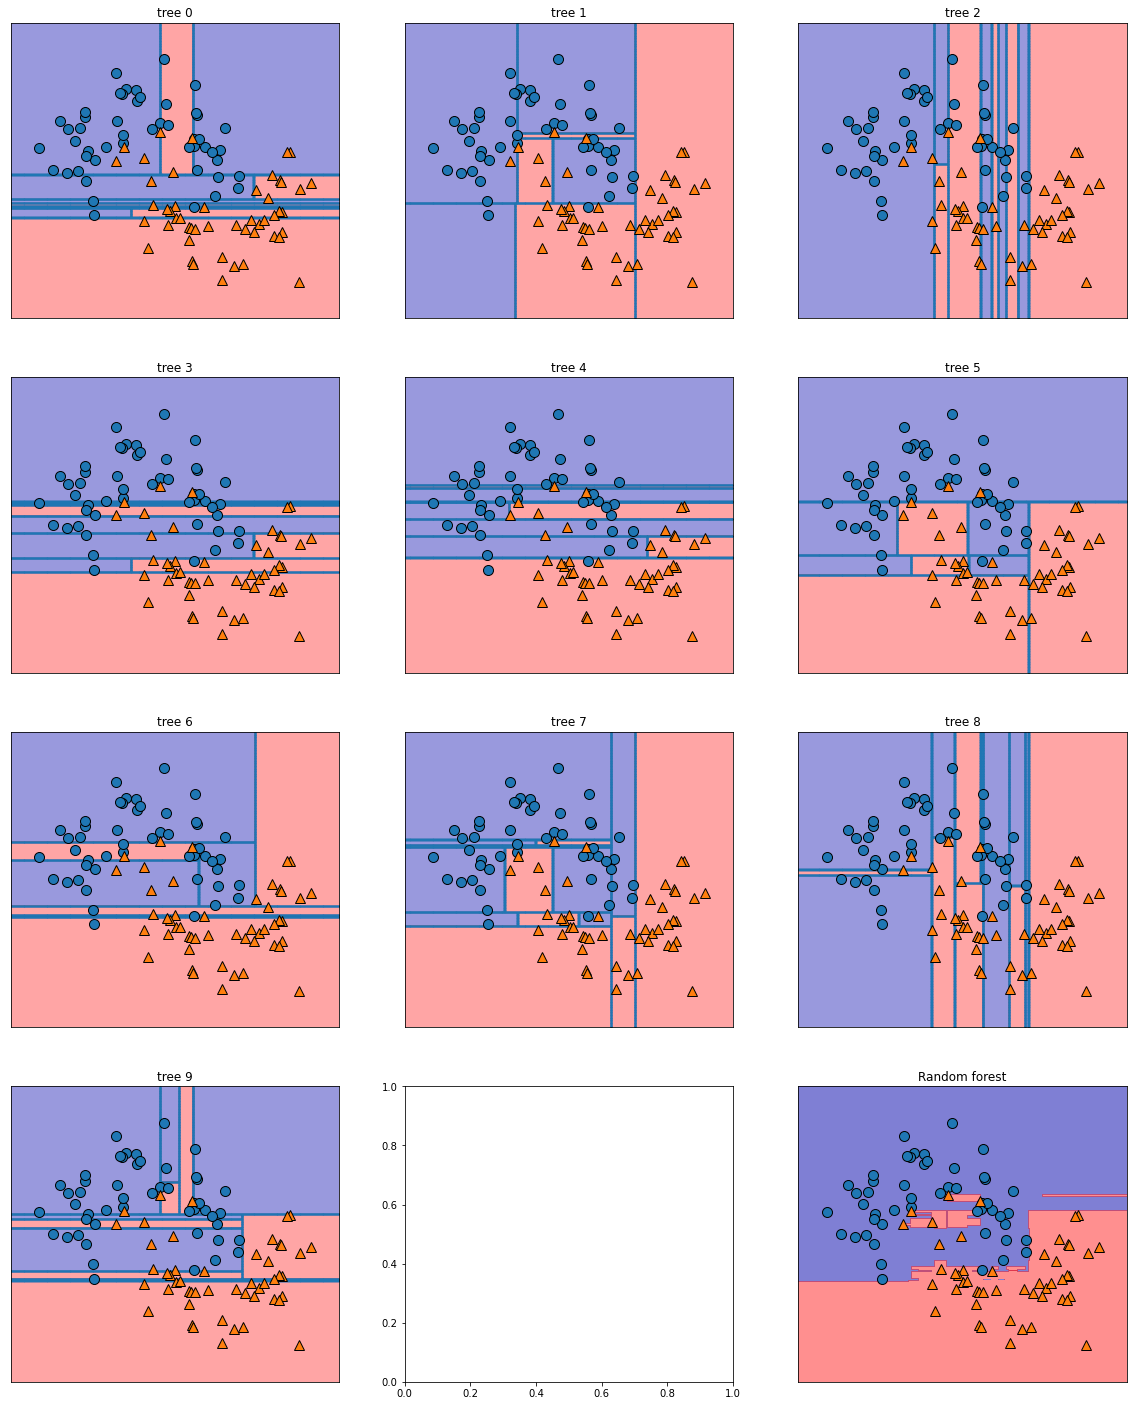

In [17]:
import matplotlib.pyplot as plt
import mglearn

# 결정 경계 시각화
# 다섯 개의 결정트리 결정 경계
fig, axes = plt.subplots(4, 3, figsize=(20,25) )
for i, (ax, tree) in enumerate( zip( axes.ravel(), forest.estimators_ ) ):   # (subplot 칸, 트리) 루프
    ax.set_title(f"tree {i}")
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)   # mglearn으로 트리 5개 시각화

# 앙상블 이후 만들어진 최종 결정경계
axes[-1, -1].set_title("Random forest")
mglearn.plots.plot_2d_separator(forest, X, fill=True, alpha=0.5, ax=axes[-1,-1] )
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### 결정 계수 테스트

In [39]:
for i in range(10,101,10):
    forest = RandomForestClassifier(n_estimators = i, random_state=SEED)
    forest.fit(X_test, y_test)
    print(f"{i} score : {forest.score(X_train, y_train)}")

10 score : 0.8533333333333334
20 score : 0.8533333333333334
30 score : 0.8666666666666667
40 score : 0.8533333333333334
50 score : 0.8533333333333334
60 score : 0.8533333333333334
70 score : 0.8533333333333334
80 score : 0.8533333333333334
90 score : 0.8666666666666667
100 score : 0.8533333333333334


# RandomizedSearchCV

In [59]:
from sklearn.model_selection import RandomizedSearchCV

# 파라미터 조정 범위 설정
params = {'n_estimators' : range(80,100),
          'max_depth' : [6, 8, 10, 12],
          'min_samples_leaf' : [8, 12, 18],
          'min_samples_split' : [8, 16, 20],
         }

forest = RandomForestClassifier(n_estimators = i, random_state=SEED)
cv = RandomizedSearchCV(forest,
                        param_distributions=params,
                        n_iter=500, #탐색 횟수
                        cv = 3,      #평가할 때 cross-validation 분할 수
                        verbose=1,   #진행상황 출력 여부
                        n_jobs=8,
                        random_state=SEED)
cv.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    4.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    8.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   13.9s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   20.6s
[Parallel(n_jobs=8)]: Done 1500 out of 1500 | elapsed:   24.4s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=111),
                   n_iter=500, n_jobs=8,
                   param_distributions={'max_depth': [6, 8, 10, 12],
                                        'min_samples_leaf': [8, 12, 18],
                                        'min_samples_split': [8, 16, 20],
                                        'n_estimators': range(80, 100)},
                   random_state=111, verbose=1)

In [60]:
cv.best_params_

{'n_estimators': 87,
 'min_samples_split': 8,
 'min_samples_leaf': 8,
 'max_depth': 10}

In [61]:
cv.best_score_

0.8533333333333334

# RandomForestRegressor

분류 할 때는 max_features = sqrt(n_features) <br>
회귀 할 때는 max_features = n_features